Problem 1: Finding the Optimal k and Bootstrap Iterations
In this task, you will use the K-Nearest Neighbors (KNN) classifier to classify handwritten digits from the

MNIST dataset. The goal is to determine:
1. The optimal number of neighbors (k) for the KNN classifier.
2. The optimal number of bootstrap iterations to obtain a confident estimate of the model’s accuracy.

You will:
1. Download and preprocess the MNIST dataset (use 10% of the dataset for faster experimentation).
2. Implement bootstrap resampling to evaluate the KNN classifier for various values of k.
3. Experiment with different numbers of bootstrap iterations.
4. Determine the optimal values of k and the minimum number of bootstrap iterations required for a
confident result.

Steps to Follow:
1. Preprocess the MNIST dataset: Normalize the pixel values (e.g., divide by 255 to scale between
0 and 1) and select a random 10% subset of the dataset.
2. KNN Classifier: Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
values of k, specifically k = 1, 2, . . . , 10.
3. Bootstrap Resampling, for each value of k, perform several bootstrap iterations:
        <p>• Resample the entire dataset with replacement to create a training set.
        <p>• Train the KNN model on the resampled data.
        <p>• Test the model on the remaining data points (out-of-bag data).
        <p>• Compute and store the accuracy on the out-of-bag data for each iteration.
4. Determine Optimal k and Bootstrap Iterations:
    <p>• Experiment with different numbers of bootstrap iterations (e.g., try 1, 2, 11, 22, 44, 88, etc.).
    <p>• Calculate the mean accuracy across bootstrap iterations for each k.
    <p>• Determine the optimal k and the number of iterations required for a stable estimate.
5. Plot:
    <p>• Plot the mean accuracy for each value of k.
    <p>• Include another plot showing how the mean accuracy stabilizes with increasing bootstrap itera-
    tions.

In [130]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Step 1, preprocessing dataset:

In [131]:
# Load MNIST dataset and normalize
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"] / 255, mnist["target"]


# Select a random 10% subset of the dataset
part = int(0.1 * len(mnist["data"]))
subset_indices = np.random.choice(X.index, size=part, replace=False)
X_subset = X.loc[subset_indices]
y_subset = y.loc[subset_indices]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2)



Step 2, calculating KNN for different k:

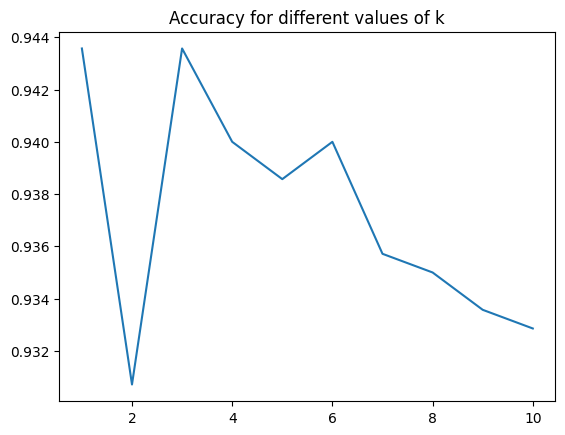

In [132]:
acc_scores = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc_scores.append(np.mean(y_pred==y_test))

plt.plot(list(range(1, 11)), acc_scores)
plt.title("Accuracy for different values of k")
plt.show()

Step 3, adding bootstrap iterations:

In [133]:
neighbours = 11 # Number of neighbours to test (range counts -1)
bootstraps = 89 # Number of bootstrap iterations

out_of_bag_scores = {i : [] for i in range(1, neighbours)} # Accuracy for each bootstrap iteration
avg_accuracy_after_bootstraps = {i : [] for i in range(1, neighbours)} # Average accuracy after each bootstrap iteration

for k in range(1, neighbours):

    # Bootstrap iterations
    for i in range(bootstraps):
        # part = int(0.1 * len(mnist["data"]))
        # subset_indices = np.random.choice(X.index, size=part, replace=True)
        # X_train = X.loc[subset_indices]
        # y_train = y.loc[subset_indices]
        # X_test = X.drop(subset_indices)
        # y_test = y.drop(subset_indices)

        X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2)
        
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        out_of_bag_scores[k].append(accuracy)

        avg_accuracy_after_bootstraps[k].append(np.mean(out_of_bag_scores[k]))

        # print(f"Accuracy for k={k}, bootstrap iteration nr {i}: {accuracy}")
    # print()


Step 4, calculating average k from bootstrap iterations:

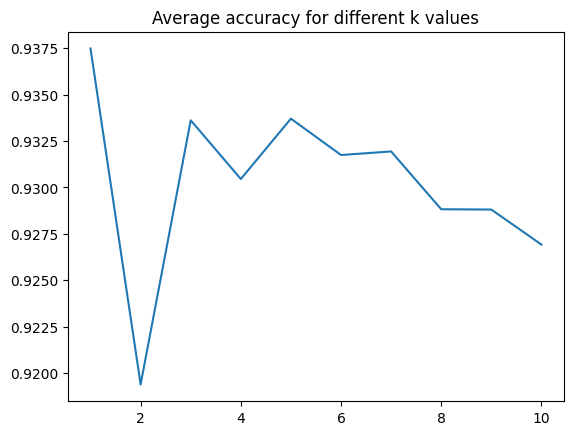

In [134]:
average_k_scores = {k : avg_accuracy_after_bootstraps[k][bootstraps-1] for k in range(1, neighbours)}

plt.plot(average_k_scores.keys(), average_k_scores.values())
plt.title("Average accuracy for different k values")
plt.show()

Step 5, ploting how the mean accuracy stabilizes with bootstrap operations:

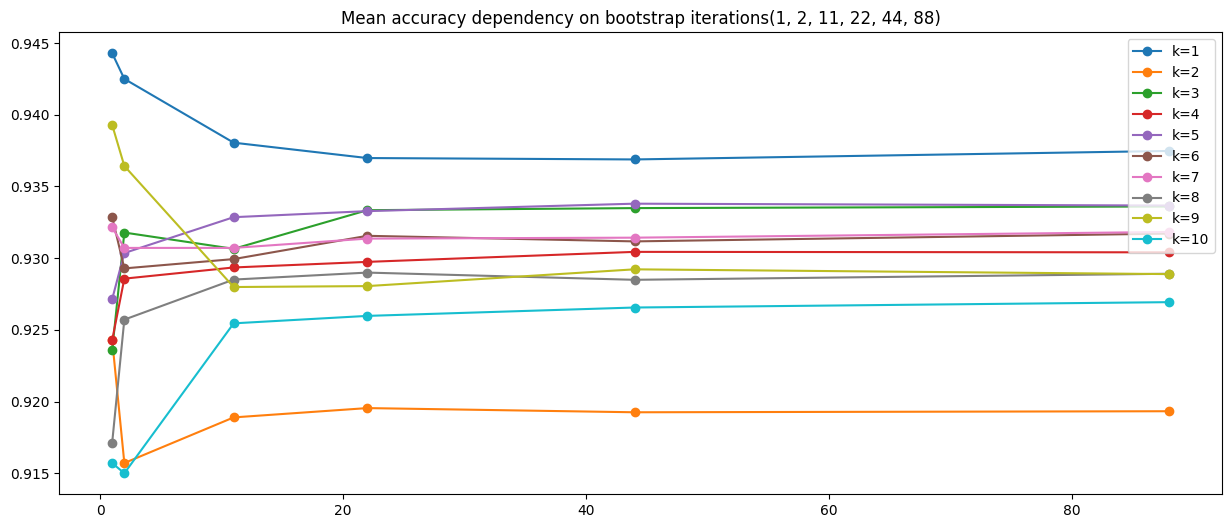

In [135]:
some_bootstraps = {k:[] for k in range(1, neighbours)}
for k in range(1, 11):
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][0]) # First bootstrap iteration
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][1]) # Second bootstrap iteration
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][10]) # Eleventh bootstrap iteration
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][21]) # Twenty-second bootstrap iteration
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][43]) # Forty-fourth bootstrap iteration
    some_bootstraps[k].append(avg_accuracy_after_bootstraps[k][87]) # Eighty-eigth bootstrap iteration

plt.figure(figsize=(15, 6))
for i in some_bootstraps:
    plt.plot([1, 2, 11, 22, 44, 88], some_bootstraps[i], marker='o', label=f"k={i}")
plt.legend(loc='upper right')
plt.title("Mean accuracy dependency on bootstrap iterations(1, 2, 11, 22, 44, 88)")
plt.show()

<i>Plot containing all bootstrap iterations accuracies (slighty less readable):

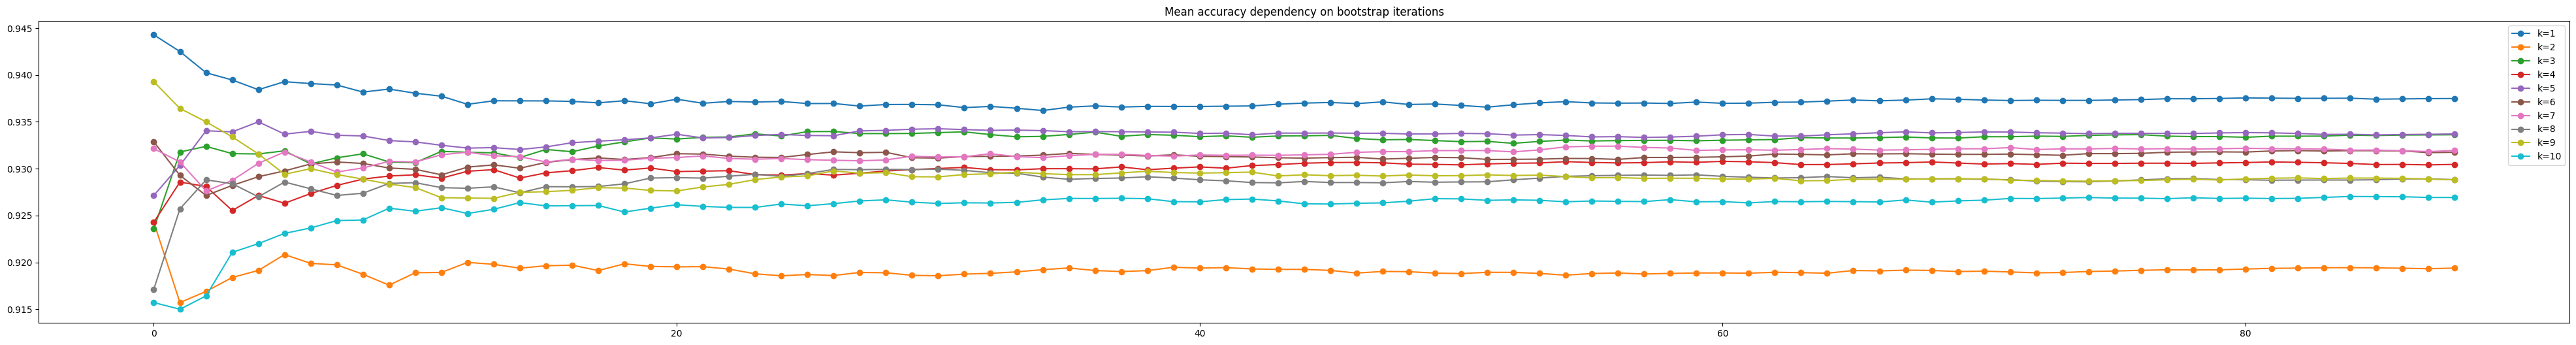

In [136]:
plt.figure(figsize=(50, 6))
for i in average_k_scores:
    plt.plot(list(range(bootstraps)), avg_accuracy_after_bootstraps[i], marker='o', label=f"k={i}")
plt.legend(loc='upper right')
plt.title("Mean accuracy dependency on bootstrap iterations")
plt.show()

<b>Summary:

From the firsts plots we could easly assume that k = 3 would be the best value for this KNN Classifier, but after more iterations we can see that also k = 6 would be a good candidate. From the last plot we see that mean accuracy stabilizes after 20 bootstrap iterations.